In [1]:
import torch
import torch.nn as nn
from torchvision import models

import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import numpy as np
from prepare_data import train_loader, val_loader, test_loader


Number of classes: 31
✅ Dataset split completed successfully!
Classes: ['Akshay_Kumar', 'Alexandra_Daddario', 'Alia_Bhatt', 'Amitabh_Bachchan', 'Andy_Samberg', 'Anushka_Sharma', 'Billie_Eilish', 'Brad_Pitt', 'Camila_Cabello', 'Charlize_Theron', 'Claire_Holt', 'Courtney_Cox', 'Dwayne_Johnson', 'Elizabeth_Olsen', 'Ellen_Degeneres', 'Henry_Cavill', 'Hrithik_Roshan', 'Hugh_Jackman', 'Jessica_Alba', 'Kashyap', 'Lisa_Kudrow', 'Margot_Robbie', 'Marmik', 'Natalie_Portman', 'Priyanka_Chopra', 'Robert_Downey_Jr', 'Roger_Federer', 'Tom_Cruise', 'Vijay_Deverakonda', 'Virat_Kohli', 'Zac_Efron']
Number of training images: 2559
Number of validation images: 1597
Number of test images: 1637


In [2]:

device = torch.device("cpu")

# Load pre-trained VGG19
vgg19_tl = models.vgg19(pretrained=True)

# Freeze convolutional layers
for param in vgg19_tl.features.parameters():
    param.requires_grad = False

# Replace classifier for 31 classes
vgg19_tl.classifier = nn.Sequential(
    nn.Linear(512*7*7, 4096),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(4096, 4096),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(4096, 31)
)

vgg19_tl = vgg19_tl.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(vgg19_tl.classifier.parameters(), lr=1e-4)
num_epochs = 10
train_acc_list = []
val_acc_list = []
train_loss_list = []


/home/doaa/miniconda3/lib/python3.13/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/doaa/miniconda3/lib/python3.13/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
for epoch in range(num_epochs):
    vgg19_tl.train()
    train_loss = 0
    all_preds = []
    all_labels = []

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = vgg19_tl(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        all_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

    train_acc = accuracy_score(all_labels, all_preds)
    train_precision = precision_score(all_labels, all_preds, average='weighted')
    train_recall = recall_score(all_labels, all_preds, average='weighted')
    train_f1 = f1_score(all_labels, all_preds, average='weighted')

    vgg19_tl.eval()
    val_preds = []
    val_labels = []
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = vgg19_tl(images)
            val_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            val_labels.extend(labels.cpu().numpy())

    val_acc = accuracy_score(val_labels, val_preds)
    val_precision = precision_score(val_labels, val_preds, average='weighted')
    val_recall = recall_score(val_labels, val_preds, average='weighted')
    val_f1 = f1_score(val_labels, val_preds, average='weighted')
    
    train_acc_list.append(train_acc)
    val_acc_list.append(val_acc)
    train_loss_list.append(train_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f} | "
          f"Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1: {train_f1:.4f}")


/home/doaa/miniconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/doaa/miniconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [1/10] Train Acc: 0.1876, Val Acc: 0.3701 | Precision: 0.1793, Recall: 0.1876, F1: 0.1783


/home/doaa/miniconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [2/10] Train Acc: 0.3892, Val Acc: 0.5003 | Precision: 0.3803, Recall: 0.3892, F1: 0.3792


/home/doaa/miniconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [3/10] Train Acc: 0.4994, Val Acc: 0.5855 | Precision: 0.4908, Recall: 0.4994, F1: 0.4915


/home/doaa/miniconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [4/10] Train Acc: 0.5471, Val Acc: 0.6606 | Precision: 0.5410, Recall: 0.5471, F1: 0.5420
Epoch [5/10] Train Acc: 0.6123, Val Acc: 0.7063 | Precision: 0.6080, Recall: 0.6123, F1: 0.6085
Epoch [6/10] Train Acc: 0.6331, Val Acc: 0.7671 | Precision: 0.6298, Recall: 0.6331, F1: 0.6303
Epoch [7/10] Train Acc: 0.6686, Val Acc: 0.7589 | Precision: 0.6670, Recall: 0.6686, F1: 0.6671
Epoch [8/10] Train Acc: 0.7112, Val Acc: 0.7990 | Precision: 0.7115, Recall: 0.7112, F1: 0.7106
Epoch [9/10] Train Acc: 0.7374, Val Acc: 0.8103 | Precision: 0.7354, Recall: 0.7374, F1: 0.7354
Epoch [10/10] Train Acc: 0.7452, Val Acc: 0.8272 | Precision: 0.7443, Recall: 0.7452, F1: 0.7441


In [4]:
cm = confusion_matrix(val_labels, val_preds)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  2  0  1  0  0  1]
 [ 0 51  0  0  0  0  0  0  4  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  1 46  0  0  0  0  0  2  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0
   1  0  0  0  0  0  0]
 [ 0  0  0 49  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0 51  0  0  0  1  0  0  0  0  0  0  2  2  0  0  0  0  0  0  0
   0  3  0  1  0  0  0]
 [ 0  0 13  0  0 22  0  0  1  0  0  1  0  0  0  0  0  0  1  0  0  0  0  0
   3  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 60  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  1  2  0  0 51  2  2  0  0  0  0  0  0  1  0  0  0  0  0  0  0
   0  9  0  6  0  0  0]
 [ 0  1  2  0  0  0  0  0 50  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  3  0  0 36  9  0  0  0  0  0  0  0  2  0  1  1  0  1
   1  0  0  0  0  0  0]
 [

In [5]:
val_probs = []

vgg19_tl.eval()
with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        outputs = vgg19_tl(images)
        probs = torch.softmax(outputs, dim=1).cpu().numpy()
        val_probs.extend(probs)

val_probs = np.array(val_probs)
val_labels_np = np.array(val_labels)

auc = roc_auc_score(val_labels_np, val_probs, multi_class="ovr")
print("AUC:", auc)


AUC: 0.995506938893731


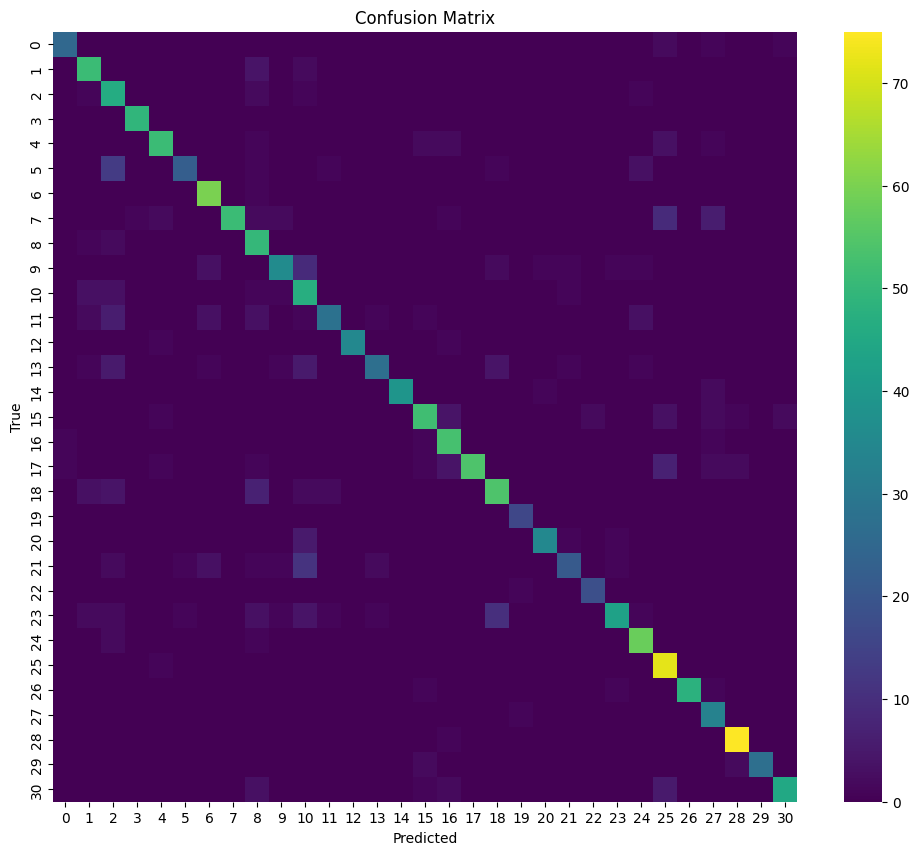

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(val_labels, val_preds)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=False, cmap="viridis")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


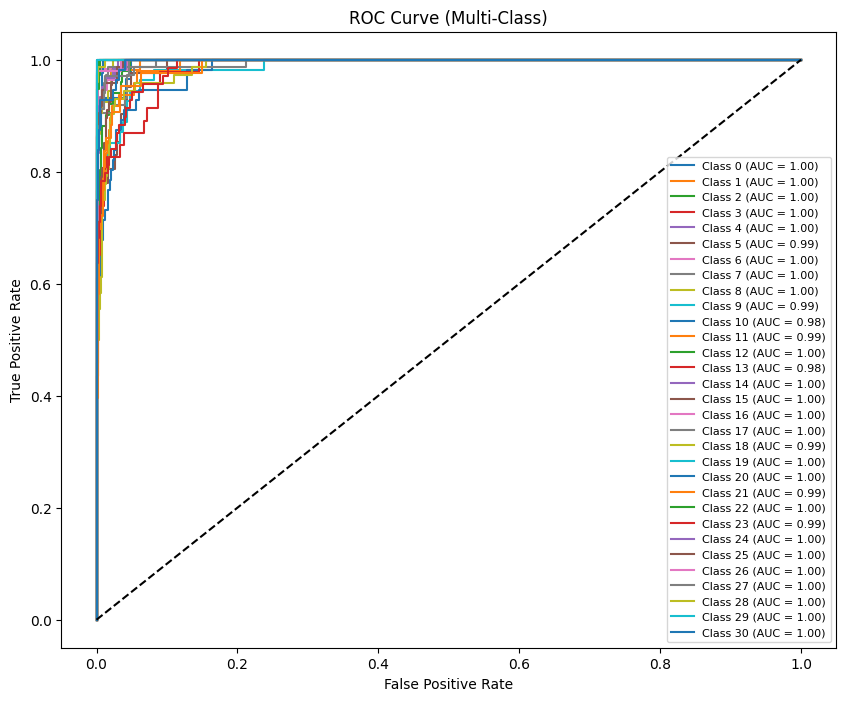

In [7]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

y_true = label_binarize(val_labels, classes=list(range(31)))
y_score = val_probs

plt.figure(figsize=(10, 8))

for i in range(31):
    fpr, tpr, _ = roc_curve(y_true[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve (Multi-Class)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(fontsize=8)
plt.show()


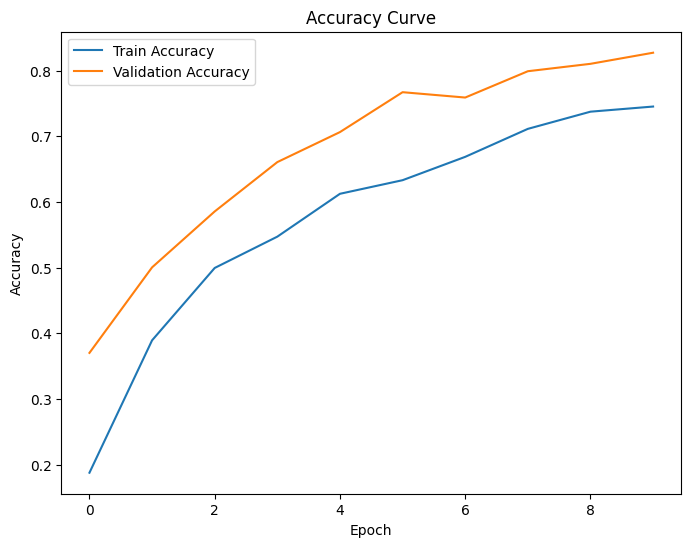

In [8]:
plt.figure(figsize=(8,6))
plt.plot(train_acc_list, label="Train Accuracy")
plt.plot(val_acc_list, label="Validation Accuracy")
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


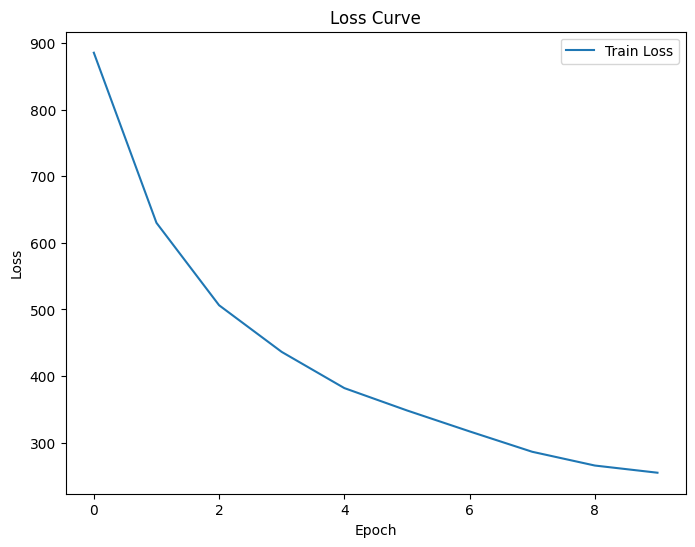

In [9]:
plt.figure(figsize=(8,6))
plt.plot(train_loss_list, label="Train Loss")
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()
